### Titanic 
-  read  file  

In [1]:
from warnings  import filterwarnings
filterwarnings('ignore')

In [2]:
import  pandas as  pd
import numpy as  np
import seaborn as sns
import  matplotlib.pyplot as  plt

In [3]:
path =  r"D:\datasets\train_titanic.xlsx"

In [4]:
df  =  pd.read_excel(path)

#### basic data Quality checks

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
n  =  df.isnull().sum()
n[n>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

###  seperation of  x  and  y 

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
x  =  df.drop(['PassengerId' ,  'Name' , 'Survived']  , axis  = 1 )
y  =  df['Survived']

In [12]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

### seperation  of cat  and numerical data

In [13]:
cat  =  x.columns[x.dtypes == 'object']
num  =  x.columns[x.dtypes != 'object']

In [14]:
print(cat)
print()
print(num)

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [15]:
x.shape

(891, 9)

In [16]:
x.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [17]:
a  =  y.value_counts()
a

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

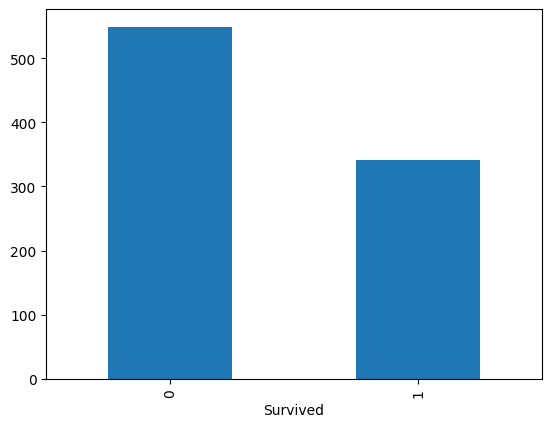

In [18]:
a.plot(kind  =  'bar')

##### create  pipeline

In [19]:
from  sklearn.pipeline import  Pipeline
from sklearn.preprocessing  import OneHotEncoder  , StandardScaler
from sklearn.impute  import SimpleImputer
from sklearn.compose  import ColumnTransformer

In [20]:
cat_pipeline1  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  =  'most_frequent')) ,  
                 ('encoder' ,  OneHotEncoder(handle_unknown  =  'ignore'))])
cat_pipeline2  = Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  = 'constant' , fill_value =  'not_Avail')) ,  
                 ('encoder' ,  OneHotEncoder(handle_unknown  =  'ignore'))]) 
num_pipeline  =  Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  =  'mean' )) , 
                ('scaler' ,  StandardScaler())])

In [21]:
cat1  =  ['Sex' , 'Ticket' ,  'Embarked']
cat2  = ['Cabin']


#### compose  all  pipelines

In [22]:
pre  =  ColumnTransformer([('cat1' , cat_pipeline1  ,  cat1 ) ,  
                       ('cat2' ,  cat_pipeline2 ,  cat2) ,  
                       ('num'  ,  num_pipeline  , num) ])

In [23]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [41]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

######  we faced  error  messege  of data type  
-  in  cat  column 'Ticket' some  obsn are  numerical
-  we have  to convert  in str 
-  used  below steps

In [24]:
x['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [26]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [27]:
Ticket  =  np.array(x['Ticket'] , dtype = 'str')

In [28]:
Ticket

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [29]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [30]:
x['Ticket'] = Ticket

In [31]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [32]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [33]:
#  apply  to data
x_scaled =  pre.fit_transform(x)

In [34]:
x_scaled =  x_scaled.toarray()

In [35]:
x_scaled

array([[ 0.        ,  1.        ,  0.        , ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.        ,  0.        ,  0.        , ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 0.        ,  1.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 0.        ,  1.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.49237783]], shape=(891, 839))

In [ ]:
##  male  , female 
1  ,  0  
0  , 1 

In [36]:
#  convert  in dataframe
x_scaled =  pd.DataFrame(x_scaled)

In [37]:
x_scaled

,0,1,2,3,4,5,6,7,8,9,...,829,830,831,832,833,834,835,836,837,838
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.000000,0.432793,2.008933,-0.176263
889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [38]:
x.shape

(891, 9)

In [39]:
x_scaled.shape

(891, 839)

In [40]:
x_scaled.columns  =  pre.get_feature_names_out()

In [41]:
x_scaled.head()

,cat1__Sex_female,cat1__Sex_male,cat1__Ticket_110152,cat1__Ticket_110413,cat1__Ticket_110465,cat1__Ticket_110564,cat1__Ticket_110813,cat1__Ticket_111240,cat1__Ticket_111320,cat1__Ticket_111361,...,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_not_Avail,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337


####  train test split

In [42]:
from  sklearn.model_selection import  train_test_split

In [43]:
x_train  ,  x_test  ,  y_train , y_test  =  train_test_split(x_scaled  ,  y ,  
                                            test_size  =  0.2  , 
                                             random_state  =  4)

In [44]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(712, 839) (712,)
(179, 839) (179,)


In [45]:
x_train.head()

,cat1__Sex_female,cat1__Sex_male,cat1__Ticket_110152,cat1__Ticket_110413,cat1__Ticket_110465,cat1__Ticket_110564,cat1__Ticket_110813,cat1__Ticket_111240,cat1__Ticket_111320,cat1__Ticket_111361,...,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_not_Avail,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.000000,-0.474545,-0.473674,-0.489442
684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.369365,2.331785,0.432793,0.767630,0.136831
605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.484880,0.432793,-0.473674,-0.335327
409,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.000000,2.247470,0.767630,-0.135658
740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.000000,-0.474545,-0.473674,-0.044381


In [46]:
x_test.head()

,cat1__Sex_female,cat1__Sex_male,cat1__Ticket_110152,cat1__Ticket_110413,cat1__Ticket_110465,cat1__Ticket_110564,cat1__Ticket_110813,cat1__Ticket_111240,cat1__Ticket_111320,cat1__Ticket_111361,...,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_not_Avail,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
646,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.823344,-0.474545,-0.473674,-0.489442
876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.746389,-0.474545,-0.473674,-0.450180
359,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.000000,-0.474545,-0.473674,-0.489776
194,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,1.100515,-0.474545,-0.473674,-0.090272
819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-1.515933,2.247470,2.008933,-0.086664


In [47]:
y_train.head()

42     0
684    0
605    0
409    0
740    1
Name: Survived, dtype: int64

In [48]:
y_test.head()

646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64

In [49]:
###  model  fitting 
from sklearn.ensemble import  RandomForestClassifier

In [50]:
RF  =  RandomForestClassifier(n_estimators  =  50  ,
                      n_jobs  =  -1 , max_depth  =  6   )

In [51]:
RF

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
RF.fit(x_train  ,  y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
RF.score(x_train  ,  y_train)

0.8146067415730337

In [54]:
RF.score(x_test  , y_test)

0.8044692737430168

### hyperparameter  tunning technique

In [55]:
from  sklearn.model_selection import GridSearchCV

In [56]:
para  =  {'n_estimators' :  (50 ,55 ,60  ,65  ,70 ,75) ,  
          'criterion' :  ['gini' ,  'entropy'] ,  
          'max_depth' :  range( 4 , 15 )}


In [57]:
model  =  RandomForestClassifier()
RF_grcv  =  GridSearchCV(model  , param_grid  =  para , 
cv  =  5  ,  n_jobs  =  -1)

In [58]:
RF_grcv.fit(x_train , y_train) 

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(4, 15), 'n_estimators': (50, ...)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,70


In [59]:
 RF_grcv.score(x_train  , y_train)

0.8834269662921348

In [60]:
RF_grcv.score(x_test  , y_test)

0.8324022346368715

In [61]:
from  sklearn.metrics  import classification_report ,  confusion_matrix

####  training evaluation

In [62]:
train_pred =  RF_grcv.predict(x_train)

In [63]:
train_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [64]:
print(classification_report(y_train  ,  train_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       430
           1       0.95      0.75      0.84       282

    accuracy                           0.88       712
   macro avg       0.90      0.86      0.87       712
weighted avg       0.89      0.88      0.88       712



In [69]:
cfm  =  confusion_matrix( y_train , train_pred )

<Axes: >

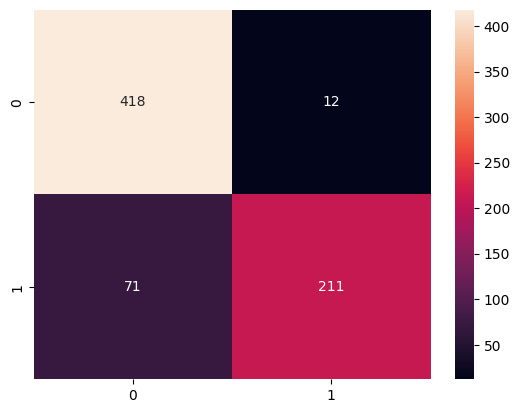

In [70]:
sns.heatmap(cfm  ,  annot  =  True  ,  fmt  =  'd' ,  xticklabels=True  , yticklabels=True)

#### testing evaluation

In [71]:
test_pred  =  RF_grcv.predict(x_test)


In [72]:
print(classification_report(y_test  ,  test_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       119
           1       0.83      0.63      0.72        60

    accuracy                           0.83       179
   macro avg       0.83      0.78      0.80       179
weighted avg       0.83      0.83      0.83       179



In [73]:
cfm_test  =  confusion_matrix(y_test  , test_pred)

<Axes: >

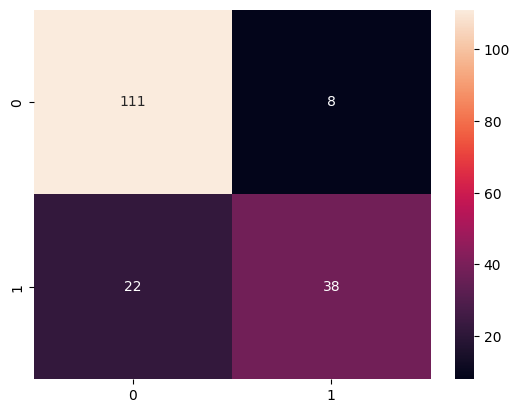

In [74]:
sns.heatmap(cfm_test , annot  = True  , xticklabels= True  , yticklabels=True  , fmt  =  'd')

####  model  fitting on  boosting 


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
GBC  =  GradientBoostingClassifier( n_estimators=70  ,  max_depth=14 )

In [81]:
GBC.fit(x_train  ,  y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,70
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,14
,min_impurity_decrease,0.0
,init,None


In [82]:
GBC.score(x_train  ,  y_train)

0.9985955056179775

In [83]:
GBC.score(x_test  ,  y_test)

0.8715083798882681

### evaluation



In [84]:
train_pred  = GBC.predict(x_train)
test_pred  =  GBC.predict(x_test)

In [85]:
print(classification_report(y_train  , train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       282

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [86]:
cfm =  confusion_matrix(y_train  , train_pred)

<Axes: >

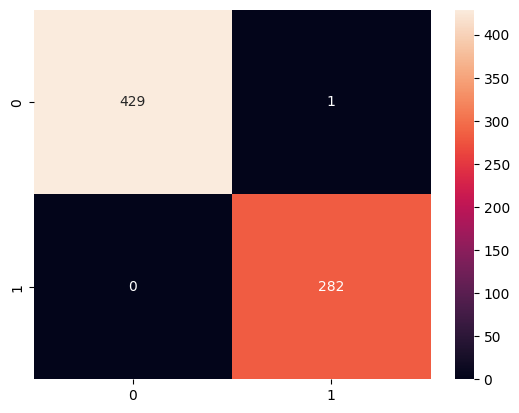

In [ ]:
sns.heatmap(cfm , annot  = True  ,
             xticklabels= True  ,
               yticklabels=True  ,
                 fmt  =  'd')

In [88]:
print(classification_report(y_test  , test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       119
           1       0.86      0.73      0.79        60

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.87       179



<Axes: >

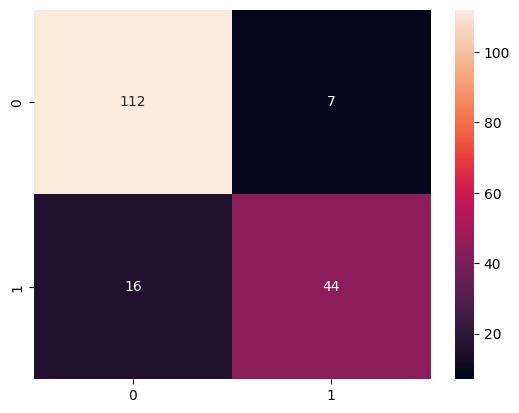

In [89]:
cfm_test  =  confusion_matrix(y_test  ,  test_pred)
sns.heatmap(cfm_test , annot  = True  , xticklabels= True  , yticklabels=True  , fmt  =  'd')